# Tema 7.2 Bagging

![scikit-learn](https://img.shields.io/badge/scikit--learn-%23F7931E.svg?style=for-the-badge&logo=scikit-learn&logoColor=white)


## Explicación

**Bagging** (Bootstrap Aggregating) es una técnica de aprendizaje automático que busca mejorar la precisión y estabilidad de modelos predictivos, especialmente en algoritmos propensos a la varianza alta, como los árboles de decisión. La idea principal es combinar múltiples modelos débiles (llamados "modelos base") para crear un modelo más robusto y preciso.

## ¿Cómo funciona el Bagging?

1. **Bootstrap**: Se generan múltiples subconjuntos de datos a partir del conjunto de datos original. Cada subconjunto se crea seleccionando muestras aleatorias con reemplazo (es decir, una misma muestra puede aparecer varias veces en un subconjunto).
2. **Entrenamiento de modelos base**: Se entrena un modelo (por ejemplo, un árbol de decisión) en cada subconjunto de datos. Cada modelo aprende de un subconjunto ligeramente diferente.
3. **Agregación**:
    - Para problemas de **clasificación**, los modelos base votan (mayoría o promedio de probabilidades) para decidir la predicción final.
    - Para problemas de **regresión**, se promedia la salida de todos los modelos base.
4. **Resultado**: Al combinar las predicciones de múltiples modelos, se reduce la varianza (sobreajuste) y se mejora la generalización del modelo.

## Ventajas de Bagging

- Reduce el sobreajuste (overfitting) al promediar o votar entre múltiples modelos.
- Es efectivo para modelos inestables, como árboles de decisión.
- Es fácil de implementar y paralelo, ya que cada modelo base se entrena de forma independiente

## Ejemplo

Imagina que quieres predecir si lloverá esta tarde. En lugar de confiar en una sola persona, preguntas a 10 meteorólogos, cada uno con una muestra diferente de datos climáticos (temperatura, humedad, etc.). Cada meteorólogo hace su predicción, y luego haces un promedio (o votación mayoritaria) de sus respuestas. Al combinar sus opiniones, reduces el riesgo de equivocarte si uno de ellos se equivoca mucho.

# Ejemplo Práctico
 
Utilizaremos el conjunto de datos Iris para clasificar tipos de flores según sus características.

In [1]:
# Importar bibliotecas necesarias
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo base (árbol de decisión)
base_model = DecisionTreeClassifier(random_state=42)

# Crear el modelo de Bagging con 10 estimadores
bagging_model = BaggingClassifier(estimator=base_model, 
                                  n_estimators=10, 
                                  random_state=42)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = bagging_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Bagging: {accuracy:.2f}")

Precisión del modelo Bagging: 1.00


# Explicación del código

1. **Datos**: Usamos el conjunto de datos Iris, que contiene 150 muestras de flores con 4 características (longitud y ancho de sépalos y pétalos) y 3 clases (tipos de flores).
2. **Modelo base**: Usamos un árbol de decisión como modelo base, que es propenso a sobreajuste.
3. **Bagging**: Creamos un modelo de Bagging con 10 estimadores (es decir, 10 árboles de decisión). Cada árbol se entrena en un subconjunto aleatorio de los datos (bootstrap).
4. **Predicción y evaluación**: El modelo combina las predicciones de los 10 árboles mediante votación mayoritaria y calculamos la precisión en los datos de prueba.

## Salida esperada
La precisión del modelo será alta (por ejemplo,**~0.95 o más**), ya que el conjunto Iris es relativamente simple. Comparado con un solo árbol de decisión, el modelo de Bagging suele ser más robusto y estable.

---

# Ejercicio propuesto

Crea un programa en Python que use Bagging para resolver un problema de **regresión**. Usa el conjunto de datos **Boston Housing** (o cualquier otro conjunto de datos de regresión disponible en **sklearn.datasets**) y sigue estos pasos:

1. Carga el conjunto de datos.
2. Divide los datos en entrenamiento (80%) y prueba (20%).
3. Crea un modelo de Bagging con un regresor base (por ejemplo, DecisionTreeRegressor) y 50 estimadores.
4. Entrena el modelo y calcula el **error cuadrático medio (MSE)** en los datos de prueba.
5. Compara el rendimiento del modelo de Bagging con un solo árbol de decisión.


In [9]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos de California Housing
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo base (árbol de decisión)
base_model = DecisionTreeRegressor(random_state=42)

# Crear el modelo de Bagging con 50 estimadores
bagging_model = BaggingRegressor(estimator=base_model, 
                                  n_estimators=10, 
                                  random_state=42)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = bagging_model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio del modelo Bagging: {mse:.4f}")

# Comparar con un solo arbol de decision
base_model.fit(X_train, y_train)
y_pred_single = base_model.predict(X_test)
mse_single = mean_squared_error(y_test, y_pred_single)
print(f"MSE del arbol de decision solo: {mse_single:.4f}")

Error cuadrático medio del modelo Bagging: 0.2824
MSE del arbol de decision solo: 0.4952


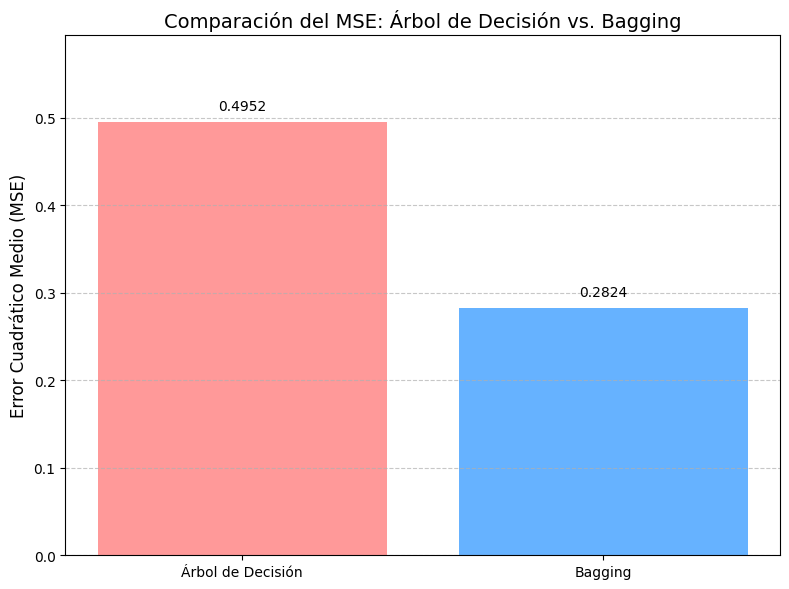

In [12]:
import matplotlib.pyplot as plt

# Visualización con gráfico de barras
models = ['Árbol de Decisión', 'Bagging']
mse_values = [mse_single, mse]
colors = ['#FF9999', '#66B2FF']  # Colores distintivos para temas claros y oscuros

plt.figure(figsize=(8, 6))
bars = plt.bar(models, mse_values, color=colors)
plt.title('Comparación del MSE: Árbol de Decisión vs. Bagging', fontsize=14)
plt.ylabel('Error Cuadrático Medio (MSE)', fontsize=12)
plt.ylim(0, max(mse_values) * 1.2)  # Ajustar el límite superior para mejor visualización

# Añadir valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', 
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

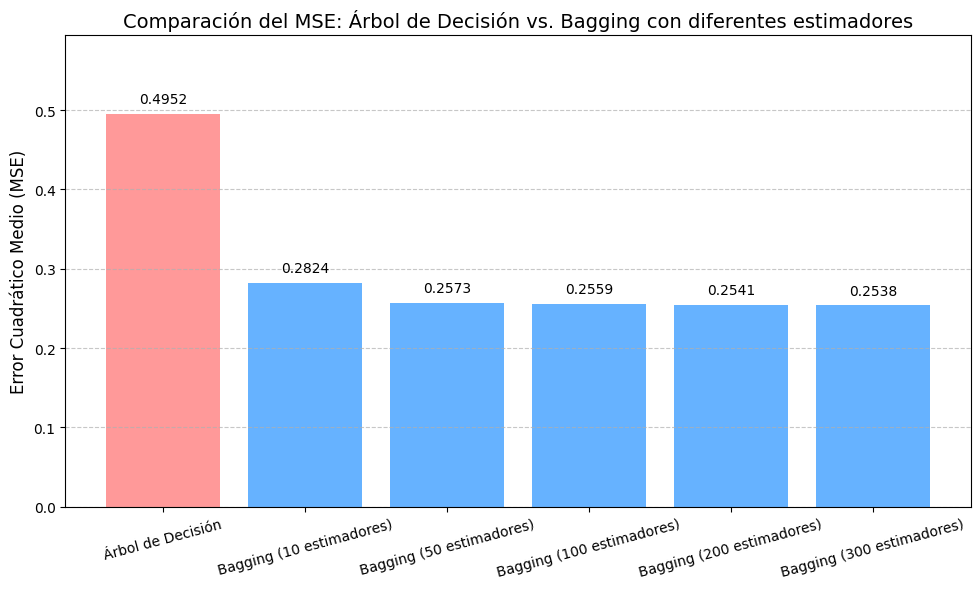

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar datos
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo base
base_model = DecisionTreeRegressor(random_state=42)
base_model.fit(X_train, y_train)
y_pred_single = base_model.predict(X_test)
mse_single = mean_squared_error(y_test, y_pred_single)

# Lista de estimadores para probar
n_estimators_list = [10, 50, 100, 200, 300]
mse_values = [mse_single]  # Incluir MSE del árbol de decisión
models = ['Árbol de Decisión']

# Calcular MSE para cada número de estimadores
for n in n_estimators_list:
    bagging_model = BaggingRegressor(estimator=base_model, 
                                     n_estimators=n, 
                                     random_state=42)
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    models.append(f'Bagging ({n} estimadores)')

# Visualización
colors = ['#FF9999'] + ['#66B2FF'] * len(n_estimators_list)  # Diferente color para árbol de decisión
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse_values, color=colors)
plt.title('Comparación del MSE: Árbol de Decisión vs. Bagging con diferentes estimadores', fontsize=14)
plt.ylabel('Error Cuadrático Medio (MSE)', fontsize=12)
plt.ylim(0, max(mse_values) * 1.2)

# Añadir valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', 
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()